In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../Data/gdp_percapita.csv.csv')
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [3]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


In [4]:
gdp_df.shape

(8219, 4)

There are 8219 rows and 4 columns in gdp_df.

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


The data type for
each column is:
"country or area" = object
"year" = integer
"value" = float
"value footnotes" = VARCHAR

In [8]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [9]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [10]:
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country',
                                  'Year':'Year', 'Value':'GDP_Per_Capita'})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [11]:
gdp_df.Country.value_counts()

Country
Latvia                       34
North America                34
Mongolia                     34
Morocco                      34
Mozambique                   34
                             ..
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, Length: 247, dtype: int64

In [12]:
all_years = gdp_df.Country.value_counts()

In [13]:
all_years.head()

Country
Latvia           34
North America    34
Mongolia         34
Morocco          34
Mozambique       34
Name: count, dtype: int64

In [14]:
all_years = all_years.to_frame()

In [15]:
all_years = all_years.reset_index()

In [16]:
all_years.head()

,Country,count
0,Latvia,34
1,North America,34
2,Mongolia,34
3,Morocco,34
4,Mozambique,34


In [17]:
all_years.sort_values(by = 'count', ascending = False)

,Country,count
0,Latvia,34
144,East Asia & Pacific,34
146,Burundi,34
147,Bulgaria,34
148,Ecuador,34
...,...,...
242,Faroe Islands,16
243,Kosovo,16
244,Sint Maarten (Dutch part),15
245,Turks and Caicos Islands,13


In [18]:
all_years = all_years.reset_index(drop = True)

In [19]:
all_years.head(229)

,Country,count
0,Latvia,34
1,North America,34
2,Mongolia,34
3,Morocco,34
4,Mozambique,34
...,...,...
224,Greece,34
225,Equatorial Guinea,34
226,Grenada,34
227,Europe & Central Asia (IDA & IBRD),34


There are 228 countries that had their gdp recorded ever year.

In [21]:
pd.set_option('display.max_rows', None)

In [22]:
pd.reset_option('display.max_rows')

In [23]:
all_years.tail(10)

,Country,count
237,San Marino,26
238,CuraÃ§ao,24
239,Afghanistan,24
240,Virgin Islands,21
241,Cayman Islands,18
242,Faroe Islands,16
243,Kosovo,16
244,Sint Maarten (Dutch part),15
245,Turks and Caicos Islands,13
246,Djibouti,11


Djibouti is a country that has alot of records missing. These are the countries that have alot of records missing.
It seems they tend to be more Island or poor countries.

I would say that there is one record per year. Not multiple.


Question 8: Plots Below

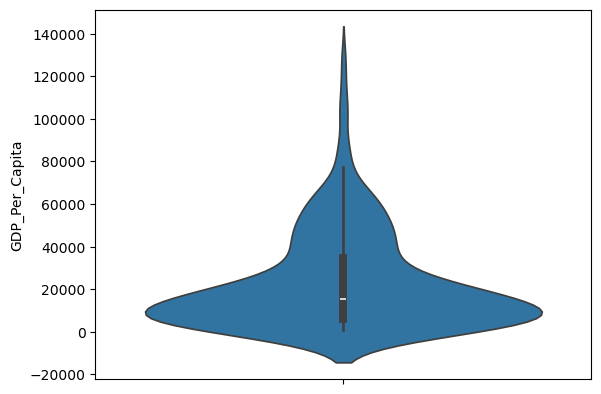

In [27]:
sns.violinplot(y = "GDP_Per_Capita", data = gdp_df[gdp_df["Year"] == 2020])
plt.show()

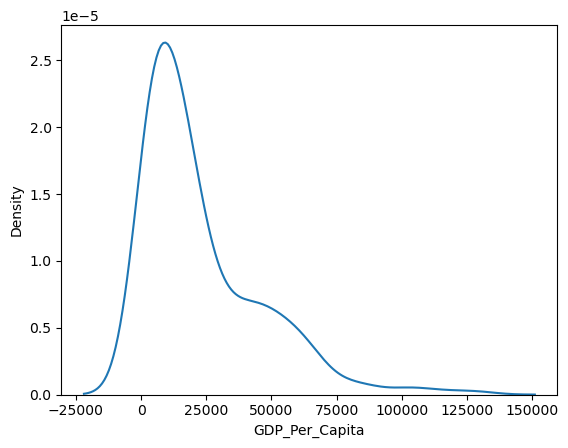

In [28]:
sns.kdeplot(x = "GDP_Per_Capita", data = gdp_df[gdp_df["Year"] == 2020])
plt.show()

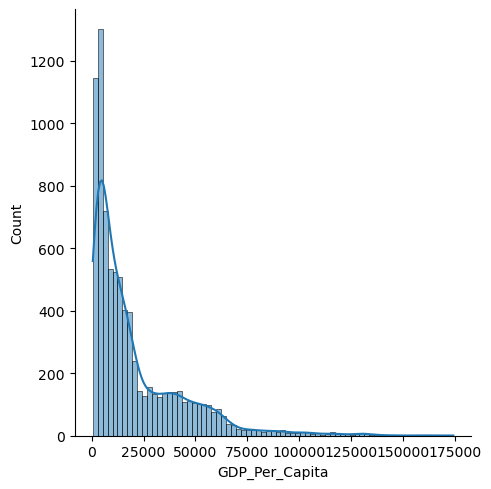

In [29]:
sns.displot( data = gdp_df["GDP_Per_Capita"], kde=True )
plt.show()

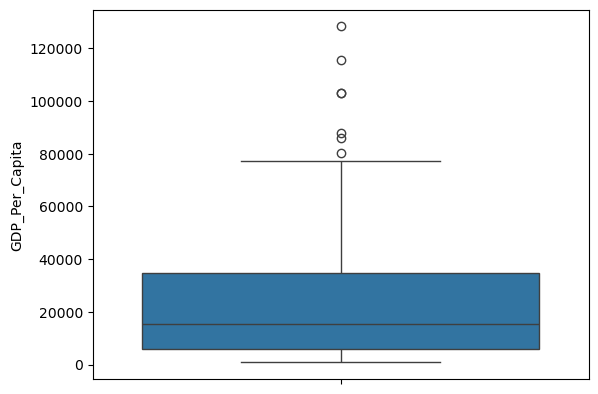

In [30]:
sns.boxplot(y = "GDP_Per_Capita", data = gdp_df[gdp_df["Year"] == 2020])
plt.show()

A violin plot allows you to visualize the distribution of a numeric variable. Violin plots deserve more attention than boxplots.
A violin plot is better to understand the distribution.
For Density charts they allow you to visualize the distributiion of a numeric variable for one or several groups, similar to a violin plot.
This density chart is useful because once data has been imported you can use the density chart to see if there are mistakes in the data.

Question 9: Find the Median

In [33]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

In [34]:
median_gdp = gdp_2020['GDP_Per_Capita'].median()
print("The median GDP per capita in 2020 is:", median_gdp)

The median GDP per capita in 2020 is: 15309.23598817024


Question 10: Create visualizations

In [36]:
four_years_list = [1990, 2000, 2010, 2020]
gdp_decades = gdp_df.loc[gdp_df.Year.isin(four_years_list)]
gdp_decades.shape

(965, 3)

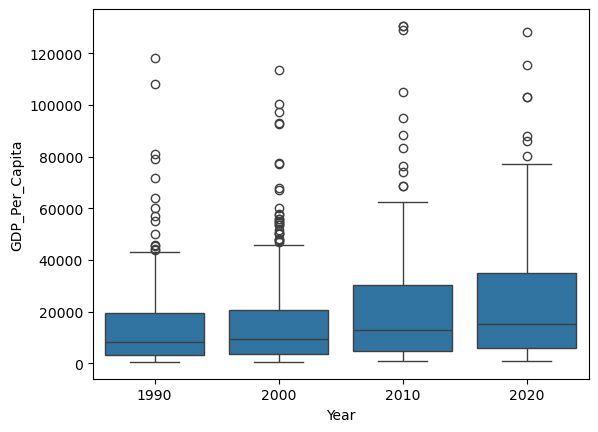

In [37]:
sns.boxplot(y = "GDP_Per_Capita", x = "Year", data = gdp_decades)
plt.show()

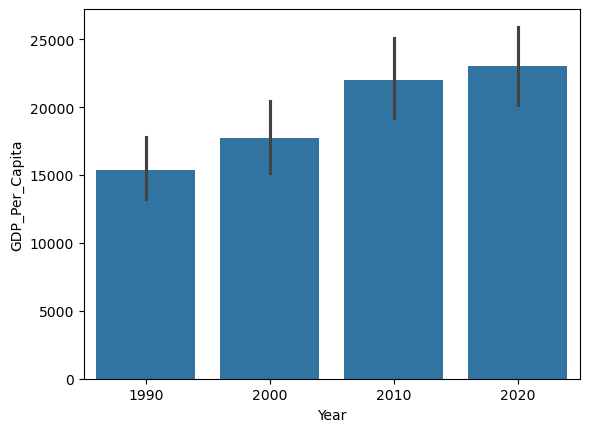

In [38]:
sns.barplot(y = "GDP_Per_Capita", x = "Year", data = gdp_decades)
plt.show()

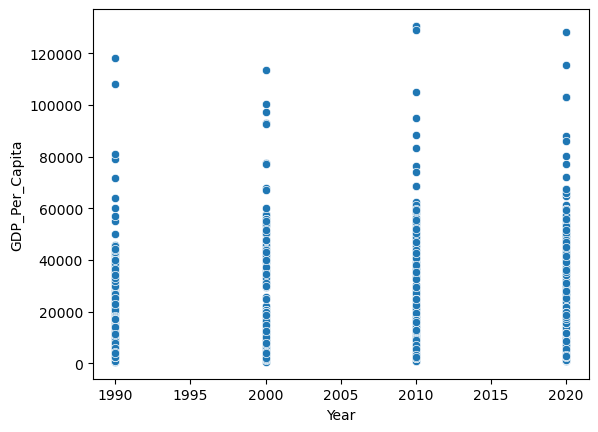

In [39]:
sns.scatterplot(y = "GDP_Per_Capita", x = "Year", data = gdp_decades)
plt.show()

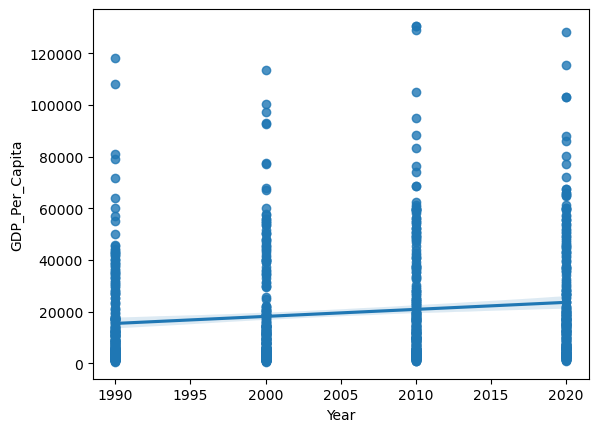

In [40]:
sns.regplot(y = "GDP_Per_Capita", x = "Year", data = gdp_decades)
plt.show()

For the scatter plot as well as the reg plot are not suited for the table created with distinct years and values.
If the values were more scattered it would be much better but since there are filters. A bar plot is much better suited for
the filtered data with distinct years.

Question 11

In [43]:
gdp_over = gdp_df.loc[gdp_df.GDP_Per_Capita > 100000]
gdp_over.shape

(106, 3)

In [44]:
gdp_over.sort_values(by = 'Year', ascending = True)

,Country,Year,GDP_Per_Capita
7827,United Arab Emirates,1990,108057.042464
974,Brunei,1990,118163.683198
7826,United Arab Emirates,1991,103098.537132
973,Brunei,1991,118220.683619
7825,United Arab Emirates,1992,101100.487512
...,...,...,...
6116,Qatar,2023,116159.142559
4457,"Macao SAR, China",2023,104961.643485
6511,Singapore,2023,127543.554752
4423,Luxembourg,2023,130373.477942


It looks like there are 2 countries. United Arab Emirates and Brunei.


Question 12: Highest GDP per Capita in 2020


In [47]:
gdp_over.sort_values(by = 'GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
4467,"Macao SAR, China",2013,174339.077325
4468,"Macao SAR, China",2012,164065.103441
4466,"Macao SAR, China",2014,162582.374111
4469,"Macao SAR, China",2011,155185.383338
6128,Qatar,2011,145591.019357
...,...,...,...
6522,Singapore,2012,100750.847965
4448,Luxembourg,1998,100738.594873
7821,United Arab Emirates,1996,100563.698291
964,Brunei,2000,100323.440022


The country with the highest gdp per capita is Macao SAR, China.

In [49]:
Macao = gdp_df.loc[gdp_df['Country'] == 'Macao SAR, China']
Macao.head()

,Country,Year,GDP_Per_Capita
4457,"Macao SAR, China",2023,104961.643485
4458,"Macao SAR, China",2022,60089.838979
4459,"Macao SAR, China",2021,74177.782525
4460,"Macao SAR, China",2020,59791.425264
4461,"Macao SAR, China",2019,133549.188038


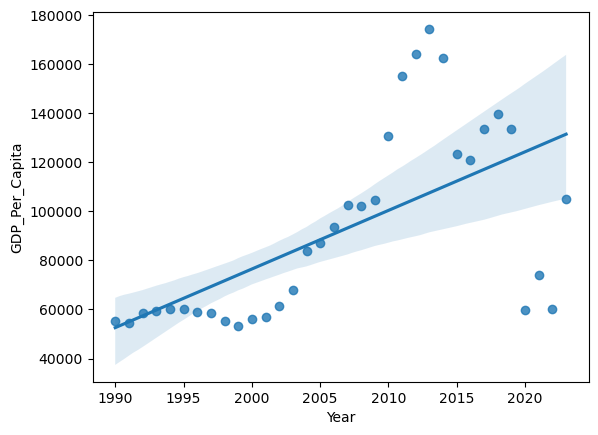

In [50]:
sns.regplot(y = "GDP_Per_Capita", x = "Year", data = Macao)
plt.show()

Question 13: Lowest GDP per Capita in 2020

In [52]:
gdp_Lowest_2020 = gdp_df[gdp_df['Year'] == 2020]

In [53]:
gdp_Lowest_2020.sort_values(by = 'GDP_Per_Capita', ascending = True)

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765
...,...,...,...
741,Bermuda,2020,87894.401174
3493,Ireland,2020,102989.787335
6119,Qatar,2020,103061.913414
6514,Singapore,2020,115304.149459


Burundi had the lowest GDP per capita in 2020

In [55]:
Burundi = gdp_df[gdp_df['Country'] == 'Burundi']

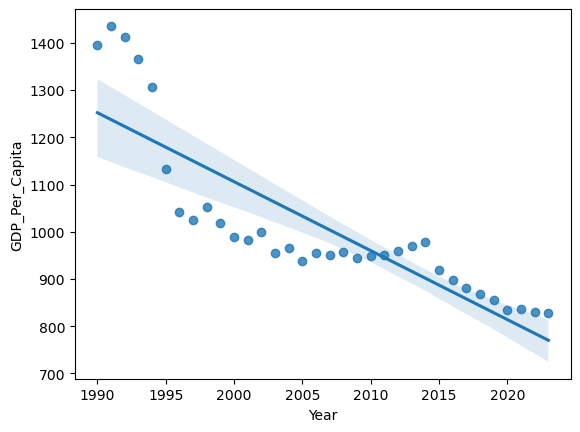

In [56]:
sns.regplot(y = "GDP_Per_Capita", x = "Year", data = Burundi)
plt.show()

Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Yes, Burundi's GDP per Capita has decreased over time. 

Which countries had lower GDP per capita in 2020 than in 1990?

In [59]:
lower_gdp_list = [1990, 2020]
gdp_decreased = gdp_df.loc[gdp_df.Year.isin(lower_gdp_list)]
gdp_decreased.shape

(480, 3)

In [60]:
gdp_over = gdp_df.loc[gdp_df.GDP_Per_Capita > 100000]


In [61]:
internet_df = pd.read_csv('../Data/internet_use.csv', on_bad_lines='skip', 
                          dtype = ({'Country or Area': 'object', 'Year': np.int64}))

In [62]:
pd.set_option('display.max_rows', None)

I tried doing it the proper way but I just went into the text file and removed all the bad data.

In [64]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


Question 15: Drop and Rename

In [66]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [67]:
internet_df = internet_df.rename(columns = {'Country or Area':'Country','Year':'Year','Value':'Internet_Users_Pct'})

Question 16: Number of Observations in this data set per Year

In [69]:
internet_df_years_count = internet_df.Year.value_counts()
internet_df_years_count = internet_df_years_count.to_frame()
internet_df_years_count.sort_values(by = 'Year', ascending = True)

,count
Year,
1990,226
1991,39
1992,50
1993,66
1994,92
1995,141
1996,177
1997,188
1998,195


For some reason in the early 90's there weren't as many observations. What could this be due to?

Question 17: First year to have non-zero internet users percentage value?

In [72]:
internet_df_non_zero = internet_df.loc[internet_df.Internet_Users_Pct > 0]
internet_df_non_zero.sort_values(by = 'Year', ascending = True)
internet_df_non_zero.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


The firt year was in 1990

Question 18: 2000 vs 2014 internet users percentage distribution difference

In [75]:
difference_list = [2000, 2014]
internet_users_difference = internet_df.loc[internet_df.Year.isin(difference_list)]
internet_users_difference.head()

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.000000
28,Albania,2014,54.300000
42,Albania,2000,0.114097
57,Algeria,2014,29.500000
71,Algeria,2000,0.491706


I could create a plot or graph to help visualize the distribution or organize a table in a certain manner to visualize the 
distribution but for the sake of time I will show this table and observe a few countries' internet_user_pct difference between 
2000 to 2014. The values do make sense. The values are much higher in 2014 than in 2000. This could be due to numerous reasons. One of them being
there is more access to computers than before. Also phones connnecting to the internet making it more accessible to eveyone compared to a desktop.

Question 19: How many countries was the percentage of internet users below 5% in 2014?

In [78]:
internet_df_2014 = internet_df.loc[(internet_df["Year"] == 2014) & (internet_df["Internet_Users_Pct"] < 5)]
internet_df_2014.Year.value_counts()

Year
2014    10
Name: count, dtype: int64

There were a total of 10 countries whose percentage of internet users were below 5% in 2014.

Question 20: Merging the two DataFrames to one

In [81]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, 
                                left_on = ['Country', 'Year'], right_on = ['Country', 'Year'],
                                how = 'outer')
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2000,1617.826475,NaN
2,Afghanistan,2001,1454.110782,0.004723
3,Afghanistan,2002,1774.308743,0.004561
4,Afghanistan,2003,1815.928200,0.087891


Question 21: Three countries with the highest internet users percentage in 2014

In [83]:
highest_internet_Users_2014 = gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2014]
highest_internet_Users_2014.sort_values(by = 'Internet_Users_Pct', ascending = False).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3944,Iceland,2014,57981.199448,98.1580
2867,Falkland (Malvinas) Islands,2014,NaN,97.6000
824,Bermuda,2014,92298.387811,96.8000
6467,Norway,2014,84753.668395,96.3005
2168,Denmark,2014,60992.212220,95.9935


In [84]:
Top_3_list = ['Iceland', 'Falkland (Malvinas) Islands', 'Bermuda']
Top_3_highest_internet_Users = gdp_and_internet_use.loc[gdp_and_internet_use.Country.isin(Top_3_list)]

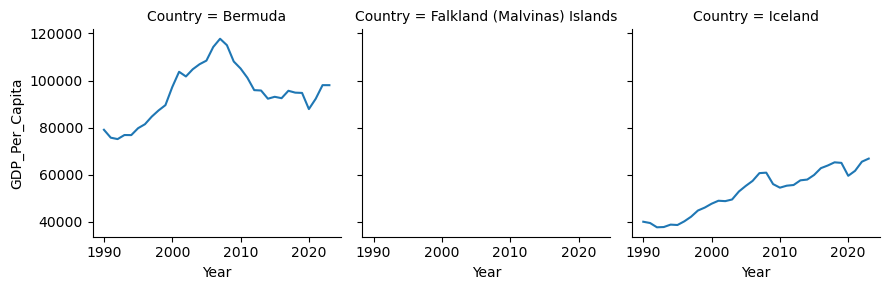

In [146]:
g = sns.FacetGrid(data = Top_3_highest_internet_Users, col = "Country")
g.map(sns.lineplot, "Year", "GDP_Per_Capita")

Question 22: Subset 